# Project: Exploratory Data Analysis on Seattle Airbnb Data
### Project Due on Friday 10th Dec 2021, 11:59 pm EST

#### Context
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

#### Content
The following Airbnb data is included in this Seattle dataset:
- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day

**To get the dataset click [here](https://georgiancollege-my.sharepoint.com/:f:/g/personal/katie_tiwari_georgiancollege_ca/Eh6hG8jQX_FBvU_pk5R5wZwB_xn5gS2eBE1vWQ_DmaH1kQ?e=evqomn)**

#### Inspiration for questions
- Can you describe the vibe of each Seattle neighborhood using listing descriptions?
- What are the busiest times of the year to visit Seattle? By how much do prices spike?
- Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?

#### **Note:** Don't discuss the results, limitations, conclusion, reasons as comment in the code cell. Use separate markdown cells instead. If you are not familier with markdown, refer this [link here](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook). Only add code related comments as comment in the code cell. Also Make sure to add comments in the code.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this section of the report, provide a brief introduction to the dataset you've selected for analysis. 

- Create atleast three complex and meaningful questions(refer inspiration questions to get an idea), then address those questions in the rest of the analysis. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

    1) Which months are the least and most expensive to visit Seattle in?

    2) Which neighbourhoods are the most and least expensive to stay in?

    3) Which property types are the most expensive?



First of all, let's import the .csv dataset files using pandas into a dataframe and look at the data.

In [1]:
import pandas as pd
df_listings = pd.read_csv('./Seattle Dataset/listings.csv')
df_calendar = pd.read_csv('./Seattle Dataset/calendar.csv')
df_reviews = pd.read_csv('./Seattle Dataset/reviews.csv')

In [2]:
df_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


The listings dataset includes the urls, names, summaries, locations etc.

In [3]:
df_calendar.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


The calendar dataset includes the listing id, date, availability (true/false) and the price.

In [4]:
df_reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


The reviews dataset includes the listing id, review id, date of review published, reviewer id, name and their comments.

Let's take a look at the dataset info, this contains the counts of each variable, their names and datatypes.


In [5]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

This shows that there are 92 variables, each contains roughly 3000-4000 values, mostly of datatypes int, float (numbers) and objects.

In [6]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


This shows that the calendar dataset has 4 variables, with id/date/available variables including almost 1400000 entries, while the variable price is only entered 934542 times.

Let's now take a look if there are any null values present in the dataset. Based on the initial exploration, we can presume that there are, indeed, null values present in all 3 datasets.

In [7]:
df_listings.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [8]:
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [9]:
df_reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

The analysis further shows that there are, indeed some null values in all 3 datasets. This finding will be worked upon in the data wrangling part of this assignment.

All in all, the initial analysis shows us what the data contains, what they do not contain and which variables might be beneficial for us to take a closer look at in the search of the answers for questions that we might have.

Based on the analysis, I have chosen these 3 questions to answer in the following parts of the assignment:
    
    1) Which months are the least and most expensive to visit Seattle in?
    2) Which neighbourhoods are the most and least expensive to stay in?
    3) Which property types are the most expensive?

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, you will load in the data, check for cleanliness, merging multiple files, printing some rows of the data in output, handling missing values, duplicat values, outliers etc. and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and privde the reasoning for every decision taken.

In the introductory section of this report, I took a closer look at the variables within the dataset and discovered that there are null values present. In this part of the report, I will be further preparing the dataset for the EDA part of this assignment.

Using plots, we can look at the distribution of missing values per variable.

Let's start with the listings dataset:

<AxesSubplot:title={'center':'Missing values per column, %'}>

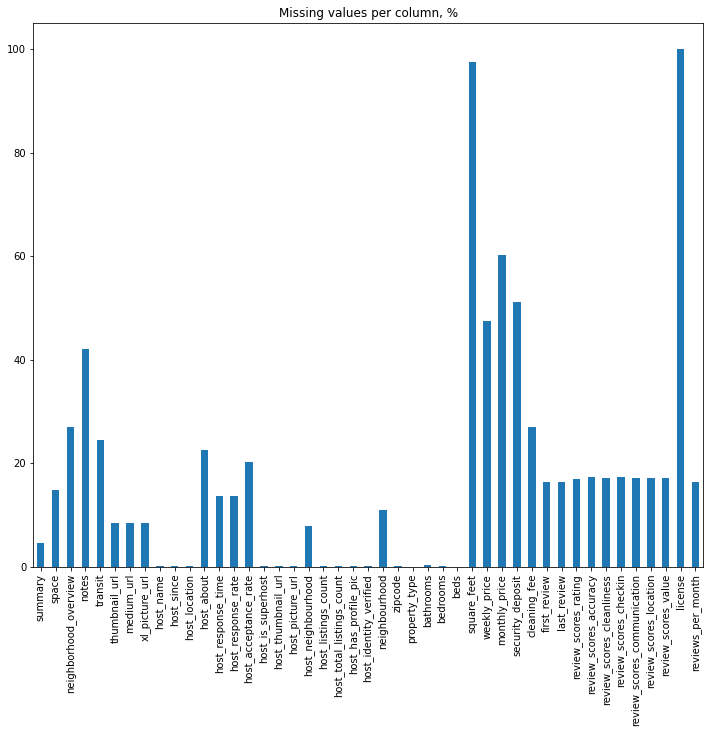

In [10]:
df_missing_listings = df_listings.isnull().mean()*100
listings_null = df_missing_listings[df_missing_listings > 0]
listings_null.plot.bar(title='Missing values per column, %', figsize=(12, 10))

We can see that there are mostly (90%+) null values in both square_feet and reviews_per_month variables. There are also null values in other variables.

Let's take a look at the null values in calendar dataset.

<AxesSubplot:title={'center':'Missing values per column, %'}>

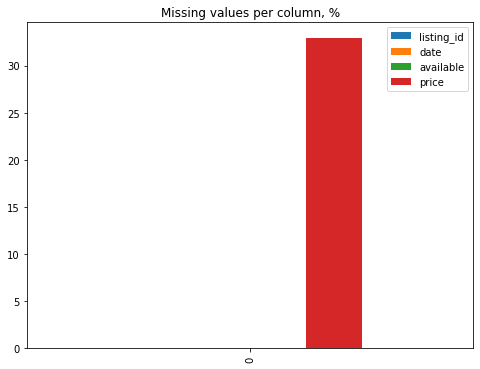

In [11]:
df_calendar_missing = pd.DataFrame([df_calendar.isnull().mean()*100])
df_calendar_missing.plot.bar(title='Missing values per column, %', figsize=(8, 6))

The variable price contains 30%+ null values. 

Let's take a look at the reviews dataset.

<AxesSubplot:title={'center':'Missing values per column, %'}>

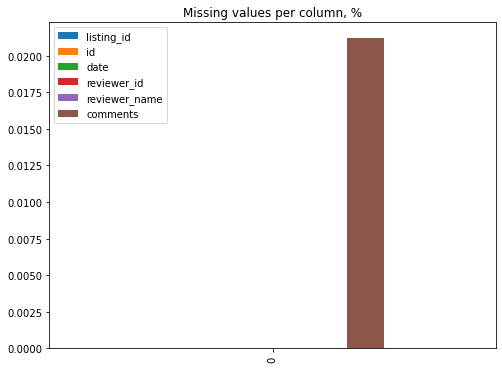

In [12]:
df_reviews_missing = pd.DataFrame([df_reviews.isnull().mean()*100])
df_reviews_missing.plot.bar(title='Missing values per column, %', figsize=(8, 6))

There are only 0.02% null values in the comments variable.

Since we have determined our three research questions, we can only focus on variables which are pertinent to our research goal. 

First, let's remove all rows where price is null (missing) in the calendar dataset.

In [13]:
df_calendar=df_calendar.dropna(subset=['price'])
df_calendar.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [14]:
df_calendar.describe(include=object)

,date,available,price
count,934542,934542,934542
unique,365,1,669
top,2017-01-01,t,$150.00
freq,2922,934542,36646


Availability also does not quite concern us.

In [15]:
df_calendar=df_calendar.drop(['available'],axis=1)
df_calendar.describe(include=object)

,date,price
count,934542,934542
unique,365,669
top,2017-01-01,$150.00
freq,2922,36646


Let's check what data types are in each column.

In [16]:
df_calendar.dtypes

listing_id     int64
date          object
price         object
dtype: object

The date is of datatype object, we need to change the data type to datetime.

In [17]:
df_calendar["date"]= pd.to_datetime(df_calendar["date"], format='%Y-%m-%d')

We should introduce a new column which would be the number corresponding to a month in a calendar year. This will help us with the analysis later. This is done because to answer the first question, we need to know the prices by month.

In [18]:
df_calendar["month"]=df_calendar["date"].dt.month

In [19]:
df_calendar.head(15)

,listing_id,date,price,month
0,241032,2016-01-04,$85.00,1
1,241032,2016-01-05,$85.00,1
9,241032,2016-01-13,$85.00,1
10,241032,2016-01-14,$85.00,1
14,241032,2016-01-18,$85.00,1
15,241032,2016-01-19,$85.00,1
16,241032,2016-01-20,$85.00,1
20,241032,2016-01-24,$85.00,1
21,241032,2016-01-25,$85.00,1
22,241032,2016-01-26,$85.00,1


We also need to remove the "$" and "," signs from price rows and change the datatype to numeric.

In [20]:
df_calendar['price'] = df_calendar['price'].str.replace(r'\$', '')
df_calendar['price'] = df_calendar['price'].str.replace(r'\,', '')
df_calendar["price"] = pd.to_numeric(df_calendar["price"])

In [21]:
df_calendar.head(10)

,listing_id,date,price,month
0,241032,2016-01-04,85.0,1
1,241032,2016-01-05,85.0,1
9,241032,2016-01-13,85.0,1
10,241032,2016-01-14,85.0,1
14,241032,2016-01-18,85.0,1
15,241032,2016-01-19,85.0,1
16,241032,2016-01-20,85.0,1
20,241032,2016-01-24,85.0,1
21,241032,2016-01-25,85.0,1
22,241032,2016-01-26,85.0,1


Now we have everything we need to implement code to answer our first question. But since all 3 questions are concerning price, we have to include the data in the listings dataset in our prepared calendar dataframe. We can do this, since we have our listing_id's available in both datasets.

First, let's drop columns that are of no use to us.

In [22]:
df_listings = df_listings[['id','neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'cleaning_fee']]

In [23]:
df_listings.head()

,id,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,cleaning_fee
0,241032,West Queen Anne,Queen Anne,Apartment,NaN
1,953595,West Queen Anne,Queen Anne,Apartment,$40.00
2,3308979,West Queen Anne,Queen Anne,House,$300.00
3,7421966,West Queen Anne,Queen Anne,Apartment,NaN
4,278830,West Queen Anne,Queen Anne,House,$125.00


We have to rename the listing_id column name to id, otherwise we won't be able to merge the two dataframes.

In [24]:
df_calendar.rename(columns={'listing_id': 'id'}, inplace=True)

Merge the two dataframes.

In [25]:
df_l_c = pd.merge(df_calendar, df_listings, on="id", how="inner")

In [26]:
df_l_c.head(1)

,id,date,price,month,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,cleaning_fee
0,241032,2016-01-04,85.0,1,West Queen Anne,Queen Anne,Apartment,NaN


We need to remove the "$" and "," signs from the cleaning_fee column and change the datatype to numeric.

In [27]:
df_l_c['cleaning_fee'] = df_l_c['cleaning_fee'].str.replace(r'\$', '')
df_l_c['cleaning_fee'] = df_l_c['cleaning_fee'].str.replace(r'\,', '')
df_l_c["cleaning_fee"] = pd.to_numeric(df_l_c["cleaning_fee"])

In [28]:
df_l_c.isnull().sum()

id                                   0
date                                 0
price                                0
month                                0
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
property_type                      309
cleaning_fee                    247995
dtype: int64

Finally, we do have some null values in the cleaning_fee column. Let's assume that it means no cleaning fee included, so we will replace the null values with 0s.

In [29]:
df_l_c['cleaning_fee'] = df_l_c['cleaning_fee'].fillna(0)

In [30]:
df_l_c.head(1)

,id,date,price,month,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,cleaning_fee
0,241032,2016-01-04,85.0,1,West Queen Anne,Queen Anne,Apartment,0.0


Our dataframe is now ready to be worked with in the last part of this assignment.

<a id='eda'></a>
## Exploratory Data Analysis

> Now you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. Look at one variable at a time, and then follow it up by looking at relationships between variables.

- The EDA should include both single-variable (1d) and multiple-variable (2d) explorations. 
- The project's visualizations should be varied and show multiple comparisons and trends. At least three kinds of plots(eg. histogram, box plot, line plot, bar plot, etc) should be created as part of the explorations.
- Please make sure reasoning is provided for each analysis decision, plot, and statistical summary.
- Visualizations made in the notebook, should depict the data in an appropriate manner (i.e., has appropriate axis labels, scale, legends, and title) that allows plots to be readily interpreted.

### 1) Which months are the least and most expensive to visit Seattle in?

As we have already prepared our data, we can now finally analyse what kind of data we are working with. We can examine the distribution of the data, look for outliers or see if there's correlations. All this gives us further insight and it also helps us make a robust machine learning model in the end.

Let's begin with checking the price histogram.

<AxesSubplot:ylabel='Frequency'>

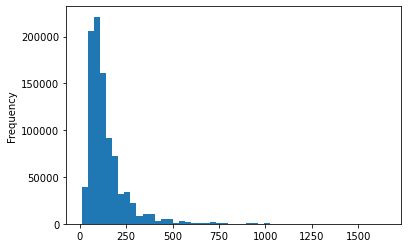

In [31]:
df_l_c["price"].plot.hist(bins=50)

The y-axis shows the count (number of occurences) and the x-axis shows the price. We can see that there's mostly listings under $250.
Let's look at the cleaning fee's as well.

<AxesSubplot:ylabel='Frequency'>

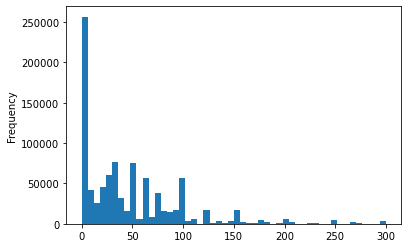

In [32]:
df_l_c["cleaning_fee"].plot.hist(bins=50)

The cleaning fee seems more "randomly" distributed, however, the most occuring value is 0, which means no cleaning fee.

Let's take a look at the average price per month. I am deliberately using the mean function here, since the histogram does resemble gaussian distribution, therefore we can presume that our data is not skewed.

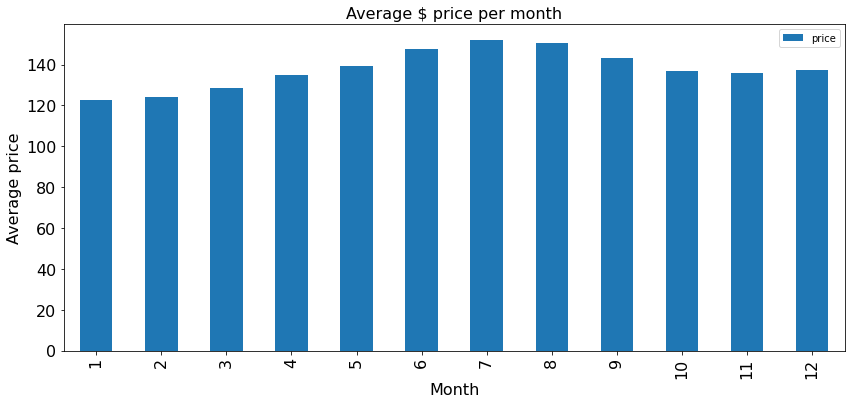

In [33]:
import matplotlib.pyplot as plt

price_by_month = df_l_c.groupby('month', as_index=False)['price'].mean()
price_by_month.plot.bar(x='month', y = 'price', figsize=(14,6));
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Average price', fontsize = 16)
plt.title("Average $ price per month", fontsize = 16);

The months January, February and March are the least expensive. Months June, July and August seem to be the most expensive.

Let us also look at the cleaning fee prices. In this case, I believe using median() function is reasonable, as the data does not resemble gaussian distribution.

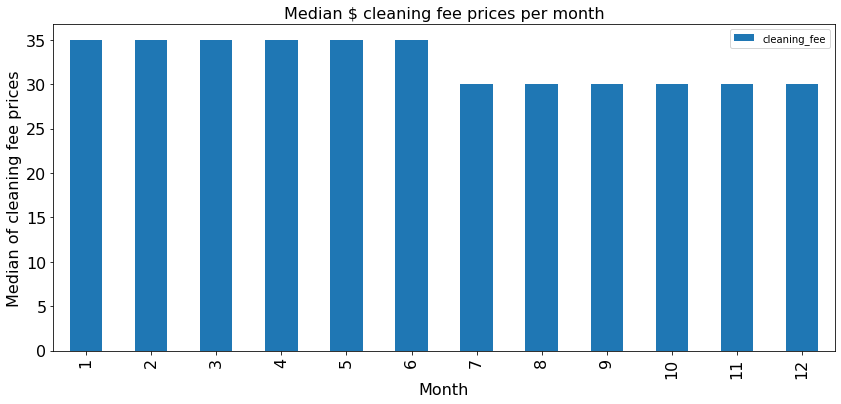

In [34]:
import matplotlib.pyplot as plt

cleaning_fee_by_month = df_l_c.groupby('month', as_index=False)['cleaning_fee'].median()
cleaning_fee_by_month.plot.bar(x='month', y = 'cleaning_fee', figsize=(14,6));
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Median of cleaning fee prices', fontsize = 16)
plt.title("Median $ cleaning fee prices per month", fontsize = 16);

The cleaning fee seems to be lower in the July - December interval by $5.

After looking at each variable individually, we can also add them together. I assume that the cleaning fee is normally added on top of the standard price.

In [35]:
df_l_c['combined_price'] = df_l_c['price'] + df_l_c['cleaning_fee']
df_l_c.head(1)

,id,date,price,month,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,cleaning_fee,combined_price
0,241032,2016-01-04,85.0,1,West Queen Anne,Queen Anne,Apartment,0.0,85.0


Let's now look if this made any difference.

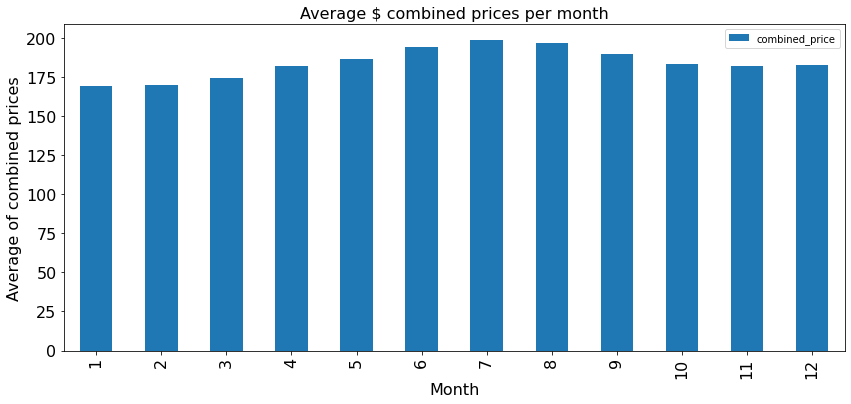

In [36]:
import matplotlib.pyplot as plt

combined_price_by_month = df_l_c.groupby('month', as_index=False)['combined_price'].mean()
combined_price_by_month.plot.bar(x = 'month', y = 'combined_price', figsize = (14,6));
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Average of combined prices', fontsize = 16)
plt.title("Average $ combined prices per month", fontsize = 16);

The histogram of combined prices shows that months June, July and August are still the most expensive, while months January, February and March are the least expensive. Finally, let's take a look at a line plot for better understanding.

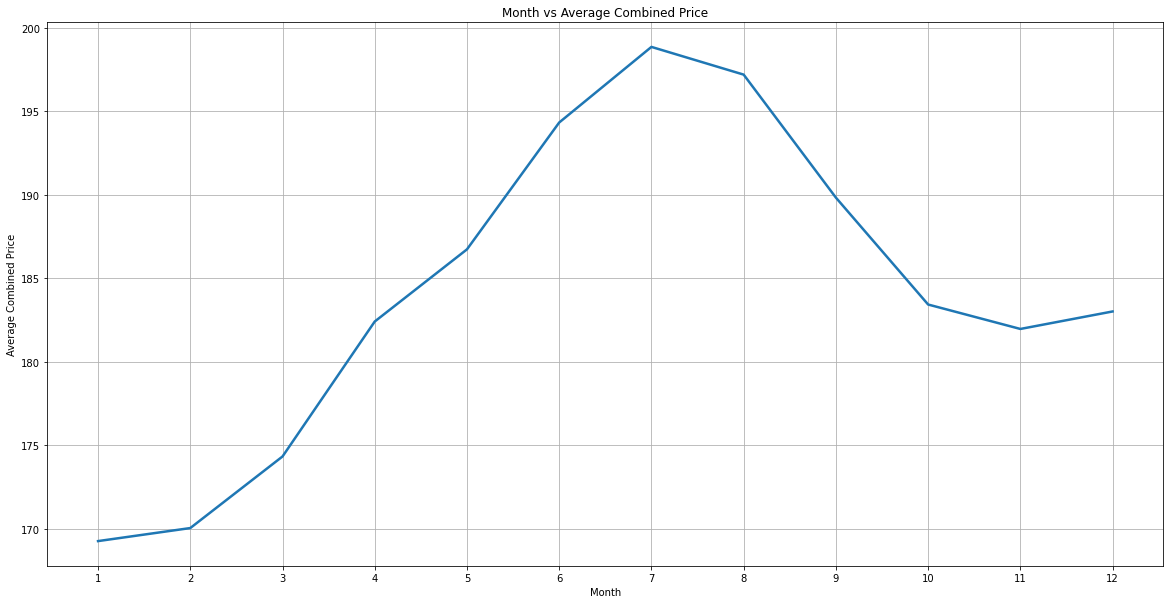

In [37]:
temp = df_l_c.groupby('month', as_index=False)['combined_price'].mean()
plt.figure(figsize=(20, 10))
x = temp['month']
y = temp['combined_price']

plt.plot(x,y,linewidth=2.5)
plt.xlabel('Month')
plt.ylabel('Average Combined Price')
plt.title('Month vs Average Combined Price')
plt.xticks(x)
plt.grid(True)
plt.show()

It is interesting to observe the pricing jump from May to June, this is probably because most people are travelling in the summer months, and so the airbnb owners can justify setting higher prices, since we can assume that there is a high demand. Let's examine if we can see anything more interesting if we plot the price, combined price and cleaning fee on one graph.

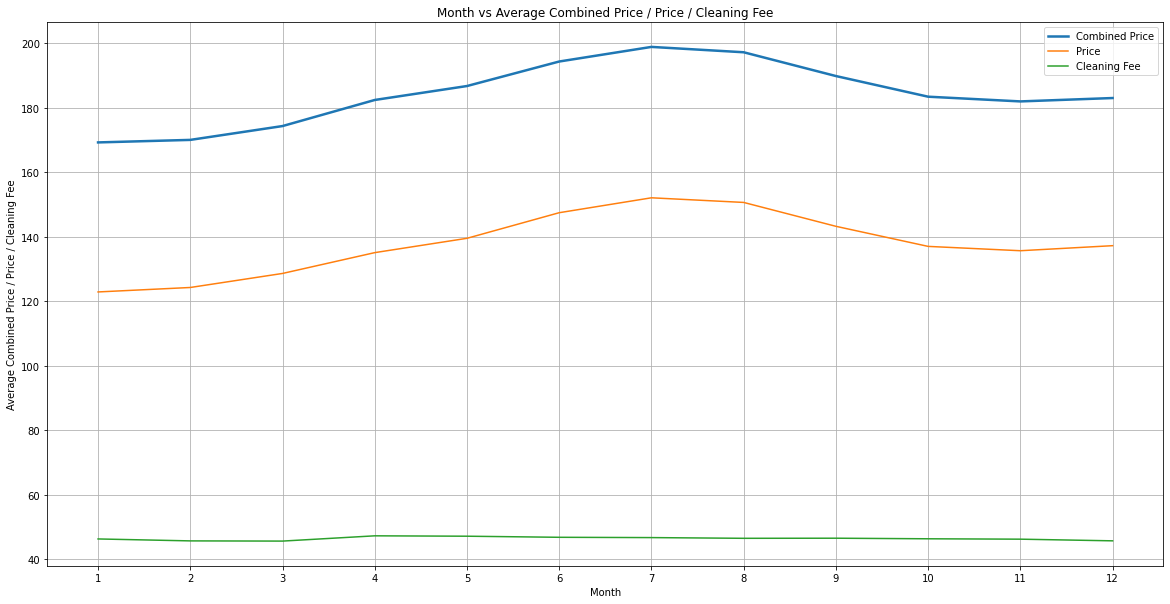

In [38]:
temp1 = df_l_c.groupby('month', as_index=False)['combined_price'].mean()

plt.figure(figsize=(20, 10))

x = temp1['month']
y = temp1['combined_price']

temp2 = df_l_c.groupby('month', as_index=False)['price'].mean()

z = temp2['price']

temp3 = df_l_c.groupby('month', as_index=False)['cleaning_fee'].mean()

w = temp3['cleaning_fee']

plt.plot(x, y, linewidth=2.5, label = "Combined Price")
plt.plot(x, z, linewidth=1.5, label = "Price")
plt.plot(x, w, linewidth=1.5, label = "Cleaning Fee")
plt.xlabel('Month')
plt.ylabel('Average Combined Price / Price / Cleaning Fee')
plt.title('Month vs Average Combined Price / Price / Cleaning Fee')
plt.xticks(x)
plt.legend()
plt.grid(True)
plt.show()

It does seem that the cleaning fee acts a constant, with not much of an impact depending on the month. The most expensive month based on combined price as well as normal price is July. The least expensive month is June.

This concludes Question 1.

### 2) Which Seattle neighbourhoods are the most and least expensive?

Let's take a look on how many neighbourhoods and districts there are. First, let's see how many unique neighbourhoods there are.

In [39]:
df_l_c["neighbourhood_cleansed"].unique()

array(['West Queen Anne', 'Adams', 'West Woodland', 'East Queen Anne',
       'Wallingford', 'North Queen Anne', 'Green Lake', 'Westlake',
       'Mann', 'Madrona', 'University District', 'Harrison/Denny-Blaine',
       'Minor', 'Leschi', 'Atlantic', 'Pike-Market', 'Eastlake',
       'South Lake Union', 'Lawton Park', 'Briarcliff', 'Belltown',
       'International District', 'Central Business District',
       'First Hill', 'Yesler Terrace', 'Pioneer Square', 'Gatewood',
       'Arbor Heights', 'Alki', 'North Admiral', 'Crown Hill',
       'Fairmount Park', 'Genesee', 'Interbay', 'Industrial District',
       'Mid-Beacon Hill', 'South Beacon Hill', 'Greenwood', 'Holly Park',
       'Fauntleroy', 'North Beacon Hill', 'Mount Baker', 'Brighton',
       'South Delridge', 'View Ridge', 'Dunlap', 'Rainier Beach',
       'Columbia City', 'Seward Park', 'North Delridge', 'Maple Leaf',
       'Ravenna', 'Riverview', 'Portage Bay', 'Bryant', 'Montlake',
       'Broadway', 'Loyal Heights', 'Vict

In [40]:
df_l_c["neighbourhood_group_cleansed"].unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

There are quite a lot of neighbourhoods, therefore I will only be listing the 10 most and least expensive neighbourhoods.

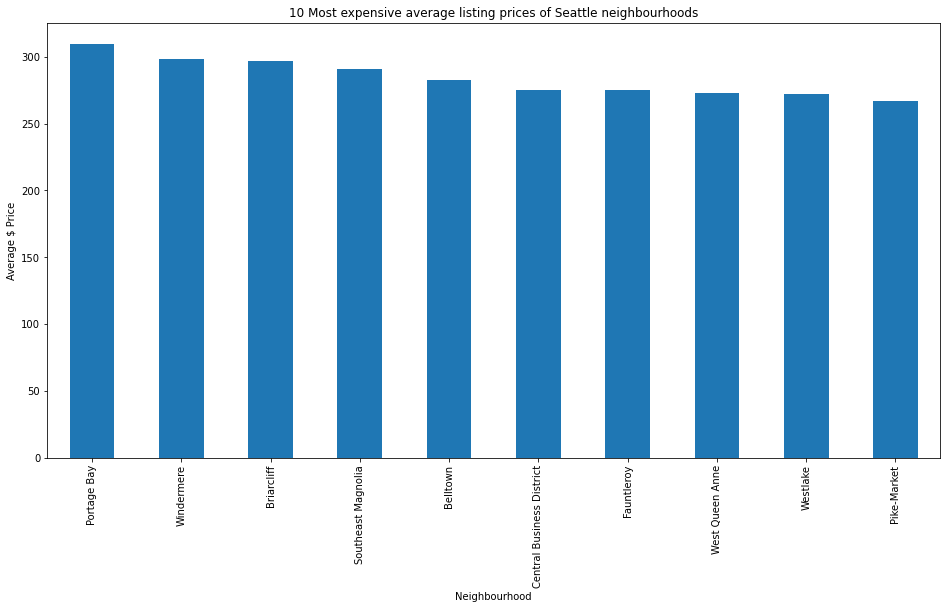

In [41]:
(df_l_c.groupby('neighbourhood_cleansed')['combined_price'].mean().sort_values(ascending=False)[:10]).plot(kind="bar", figsize=(16,8));
plt.title("10 Most expensive average listing prices of Seattle neighbourhoods");
plt.xlabel('Neighbourhood');
plt.ylabel('Average $ Price');

The histogram shows 10 most expensive neighbourhoods in descending order. Portage Bay has the largest average listing price.

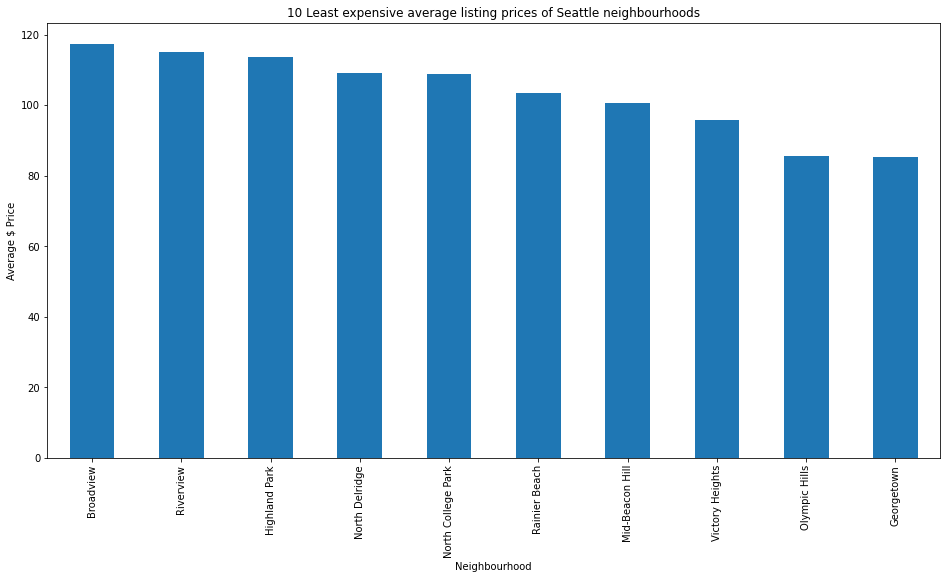

In [42]:
(df_l_c.groupby('neighbourhood_cleansed')['combined_price'].mean().sort_values(ascending=False)[-10:]).plot(kind="bar", figsize=(16,8));
plt.title("10 Least expensive average listing prices of Seattle neighbourhoods");
plt.xlabel('Neighbourhood');
plt.ylabel('Average $ Price');

The histogram shows 10 least expensive neighbourhoods in descending order. Georgetown has the lowest average listing price.

However, since we have used mean in the previous peek at the data, it would also be nice to compare if there is any difference when we look at the median vs mean prices.

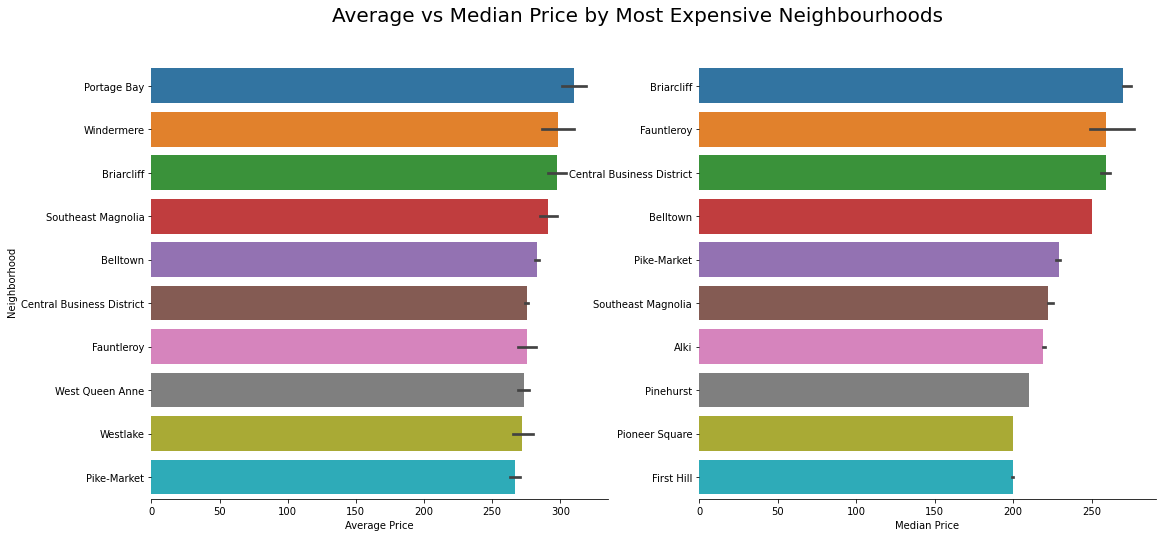

In [43]:
import seaborn as sns
import numpy as np

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
fig.suptitle("Average vs Median Price by Most Expensive Neighbourhoods", fontsize=20)
rank = df_l_c.groupby('neighbourhood_cleansed')['combined_price'].mean().sort_values(ascending=False)[:10].index
sns.barplot(x='combined_price', y='neighbourhood_cleansed', data=df_l_c, hue_order=None, order=rank, ax=ax1)
ax1.set_ylabel("Neighborhood")
ax1.set_xlabel("Average Price")
rank = df_l_c.groupby('neighbourhood_cleansed')['combined_price'].median().sort_values(ascending=False)[:10].index
sns.barplot(x='combined_price', y='neighbourhood_cleansed', data=df_l_c, estimator=np.median, hue_order=None, order=rank, ax=ax2)
ax2.set_ylabel("")
ax2.set_xlabel("Median Price")
sns.despine(left=True)

There are differences, it would be beneficial to compare the two groups using grouped bar plots. Needless to say, some bars will be missing, because there are neighbourhoods missing from either the Median price or Average price top 10 samples. 

Let's only pick 5 from each median and mean sampled neighbourhood data, since they are not present in both samples, it would be cluttered otherwise.

<AxesSubplot:title={'center':'Average and Median Prices by Most Expensive Neighbourhoods'}, xlabel='neighbourhood_cleansed', ylabel='combined_price'>

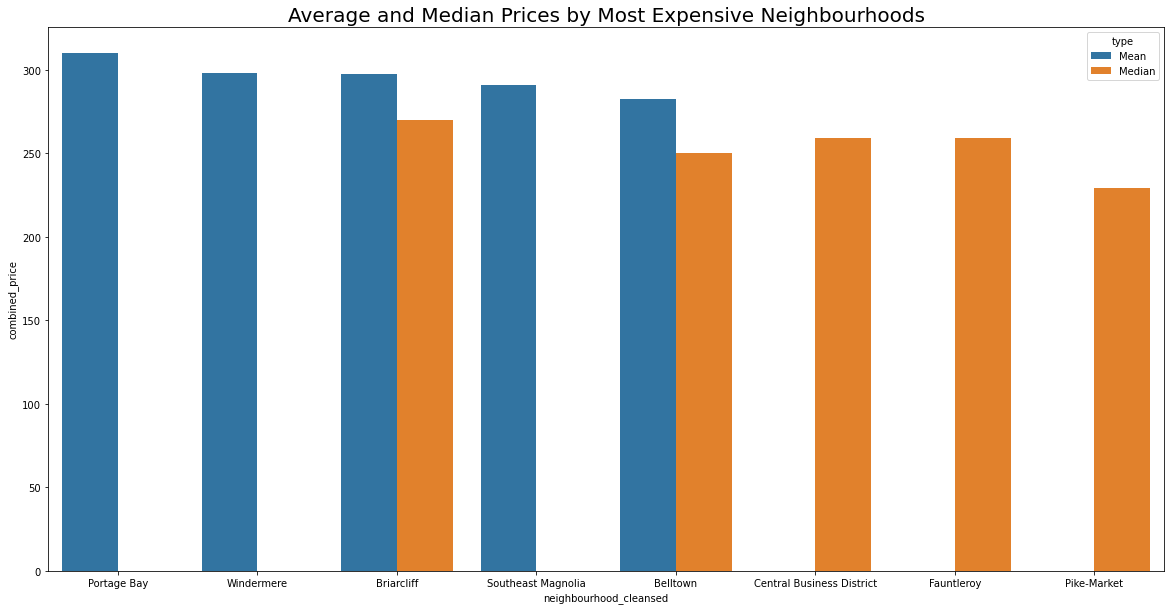

In [44]:
temp1 = df_l_c.groupby('neighbourhood_cleansed', as_index=False)['combined_price'].mean().sort_values(ascending=False, by='combined_price')

plt.figure(figsize=(20, 10))
plt.title("Average and Median Prices by Most Expensive Neighbourhoods", fontsize=20)
x = temp1['neighbourhood_cleansed']
y = temp1['combined_price']

temp2 = df_l_c.groupby('neighbourhood_cleansed', as_index=False)['combined_price'].median().sort_values(ascending=False, by='combined_price')

z = temp2['neighbourhood_cleansed']
w = temp2['combined_price']

temp1['type']="Mean"
temp2['type']="Median"

res = pd.concat([temp1[:5], temp2[:5]])
sns.barplot(x="neighbourhood_cleansed",y="combined_price", data=res, hue='type')

Based on the output, we can say that the most expensive neighbourhood is Portage Bay (based on the mean value of combined price of listings). Briarcliff is the most expensive neighbourhood based on the median value of combined price of listings.

Let's do the same with the least expensive neighbourhoods.


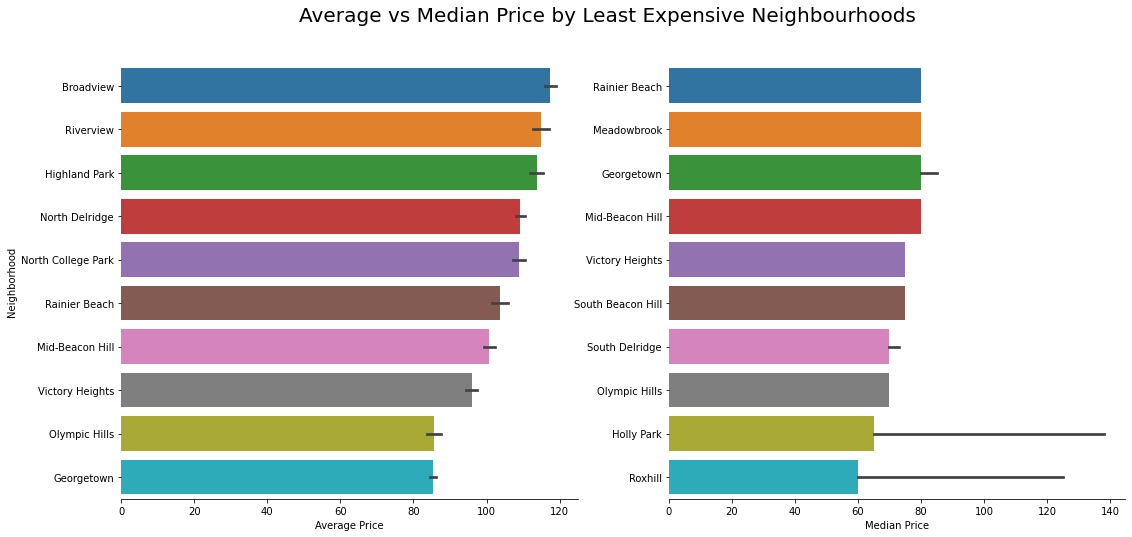

In [45]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
fig.suptitle("Average vs Median Price by Least Expensive Neighbourhoods", fontsize=20)
rank = df_l_c.groupby('neighbourhood_cleansed')['combined_price'].mean().sort_values(ascending=False)[-10:].index
sns.barplot(x='combined_price', y='neighbourhood_cleansed', data=df_l_c, hue_order=None, order=rank, ax=ax1)
ax1.set_ylabel("Neighborhood")
ax1.set_xlabel("Average Price")
rank = df_l_c.groupby('neighbourhood_cleansed')['combined_price'].median().sort_values(ascending=False)[-10:].index
sns.barplot(x='combined_price', y='neighbourhood_cleansed', data=df_l_c, estimator=np.median, hue_order=None, order=rank, ax=ax2)
ax2.set_ylabel("")
ax2.set_xlabel("Median Price")
sns.despine(left=True)

<AxesSubplot:title={'center':'Average and Median Prices by Least Expensive Neighbourhoods'}, xlabel='neighbourhood_cleansed', ylabel='combined_price'>

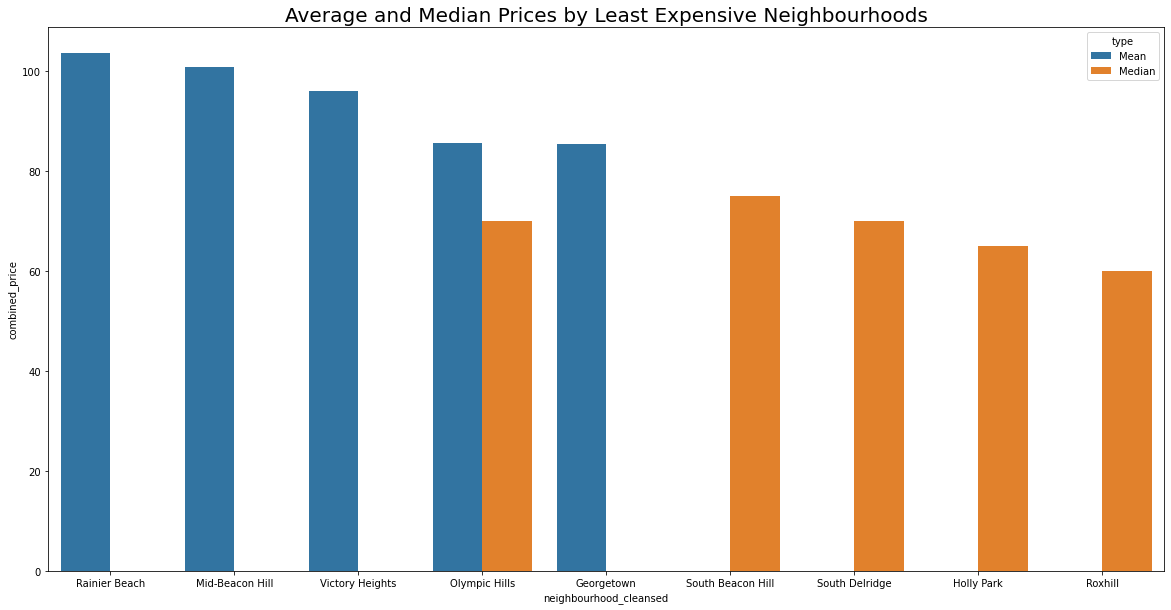

In [46]:
temp1 = df_l_c.groupby('neighbourhood_cleansed', as_index=False)['combined_price'].mean().sort_values(ascending=False, by='combined_price')

plt.figure(figsize=(20, 10))
plt.title("Average and Median Prices by Least Expensive Neighbourhoods", fontsize=20)
x = temp1['neighbourhood_cleansed']
y = temp1['combined_price']

temp2 = df_l_c.groupby('neighbourhood_cleansed', as_index=False)['combined_price'].median().sort_values(ascending=False, by='combined_price')

z = temp2['neighbourhood_cleansed']
w = temp2['combined_price']

temp1['type']="Mean"
temp2['type']="Median"

res = pd.concat([temp1[-5:], temp2[-5:]])
sns.barplot(x="neighbourhood_cleansed",y="combined_price", data=res, hue='type')

Based on the output, we can say that the least expensive neighbourhood is Georgetown (based on the mean value of combined price of listings). Roxhill is the least expensive neighbourhood based on the median value of combined price of listings.

This concludes Question 2.

###  3) Which property types are the most expensive?

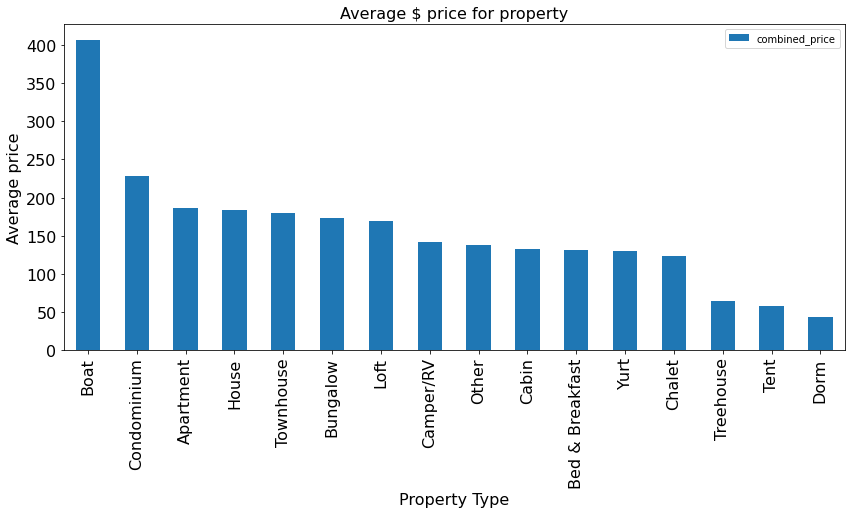

In [47]:
price_by_month = df_l_c.groupby('property_type', as_index=False)['combined_price'].mean().sort_values(ascending=False, by="combined_price")
price_by_month.plot.bar(x='property_type', y = 'combined_price', figsize=(14,6));
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Property Type', fontsize = 16)
plt.ylabel('Average price', fontsize = 16)
plt.title("Average $ price for property", fontsize = 16);

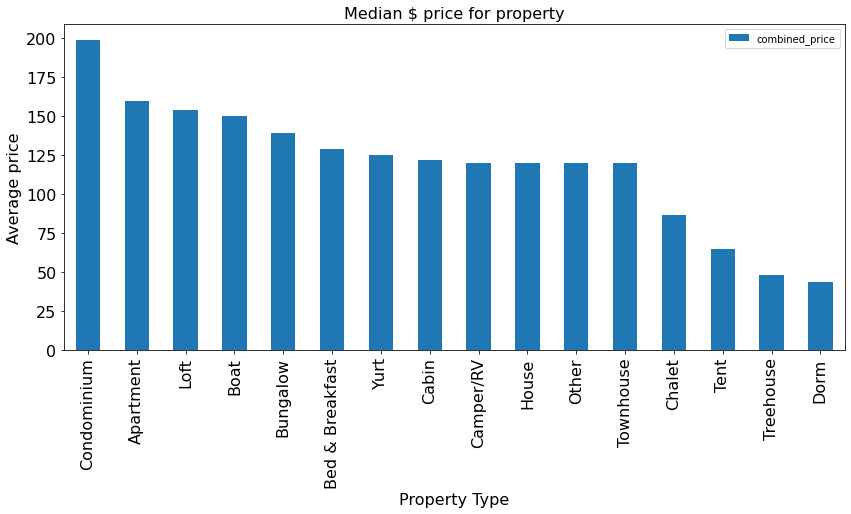

In [48]:
price_by_month = df_l_c.groupby('property_type', as_index=False)['combined_price'].median().sort_values(ascending=False, by="combined_price")
price_by_month.plot.bar(x='property_type', y = 'combined_price', figsize=(14,6));
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Property Type', fontsize = 16)
plt.ylabel('Average price', fontsize = 16)
plt.title("Median $ price for property", fontsize = 16);

If we look at the plots, the first one contains mean values of combined price, while the second one contains median values by property types. Based on the two plots, we can say that the Condominium and Boats are the most expensive property types. Since the values of mean and median are significantly different, we should believe median values more, since these should represent the data better. Based on this, I would assume that the Condominium property type is the most expensive.

This concludes Question 3.

<a id='conclusions'></a>
## Conclusions

> At the end, summarize your findings and the results that have been performed. 
- The Conclusion should reflect on the steps taken during the data exploration, summarize the main findings in relation to the questions provided at the beginning of the analysis accurately.
- The conclusion points out where additional research can be done or where additional information could be useful and **should have at least 1 limitation explained clearly.**
- The analysis should not state or imply that one change causes another based solely on a correlation. You can refer to this video on [Correlation does not mean Causation](https://youtu.be/VMUQSMFGBDo)


In the Introduction part of this assignment, we have examined the data from a high level, understood the different variables contained within the data and chose 3 research questions:

    1) Which months are the least and most expensive to visit Seattle in?
    2) Which neighbourhoods are the most and least expensive to stay in?
    3) Which property types are the most expensive?
    
In the Data wrangling part of this assignment, we have further examined the data, cleaned and merged different variables in our new dataframe and we used this dataframe further in the EDA part of this assignment to answer the research questions.

In the EDA part of this assignment, we have looked at the three research questions by analysing various plots and results of our findings. We have found that the dataset has often different median and mean values of the price variable. This affected our research, since we had to plot the data for each case and preferably make an informed decision based on which values we believed more.

One limitation would be the fact that square_feet has 90%+ missing values, which essentially makes any data analysis using this variable impossible.

There is a clear limitation when it comes to removing outliers. I believe that the data is correct, therefore I haven't made much effort removing the outliers and looking at different results. I don't think it would be helpful though, as the data was supplied by Airbnb and probably correct. 

Another limitation is the amount of missing prices from the Calendar dataset. We have lost roughly 460 000 entries, since we had to remove the rows which contained null values.

However, I have attempted my best at answering the three research questions within the EDA part of this assignment, and here are the answers to conclude:

    1) June, July and August are the most expensive months to visit Seattle in. January, February and March are the least expensive months to visit Seattle in.
    2) Portege Bay and Briarcliff are the most expensive neighbourhood to stay in. Roxhill is the least expensive neighbourhood to stay in.
    3) Condominium is the most expensive property type.